In [40]:


import numpy as np
import open3d as o3d
from matplotlib import pyplot as plt
from PIL import Image

#Load Point Cloud from saved File

The position of each point is saved as a np array, and the color of each point is also saved as a separate np array.

In [170]:

pcd_path = "Pointclouds/demo_ (1).pcd"
pcd_load = o3d.io.read_point_cloud(pcd_path, format='pcd')
pcd_points = np.asarray(pcd_load.points)
pcd_colors_orig = np.asarray(pcd_load.colors)
orig = pcd_colors_orig

In [163]:
o3d.visualization.draw_geometries([pcd_load],
                                  zoom=0.5,
                                  front=[ 0, 0, -1],
                                  lookat=[ 0, 0, .3],
                                  up=[ 0, -1, 0])


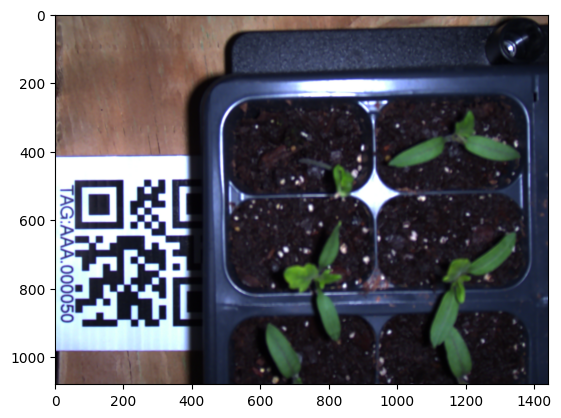

In [171]:
left_image = Image.open('Images/left_rect (1).png')
left_image_array = np.asarray(left_image)[:, :, 0:3]
plt.imshow(left_image_array)

In [165]:
cl, ind = pcd_load.remove_statistical_outlier(nb_neighbors=100, std_ratio=2.0)
inlier_cloud = pcd_load.select_by_index(ind)
outlier_cloud = pcd_load.select_by_index(ind, invert=True)
outlier_cloud.paint_uniform_color([1, 0, 0])
#inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])
o3d.visualization.draw_geometries([inlier_cloud],
                                  zoom=0.5,
                                  front=[ 0, 0, -1],
                                  lookat=[ 0, 0, .3],
                                  up=[ 0, -1, 0])

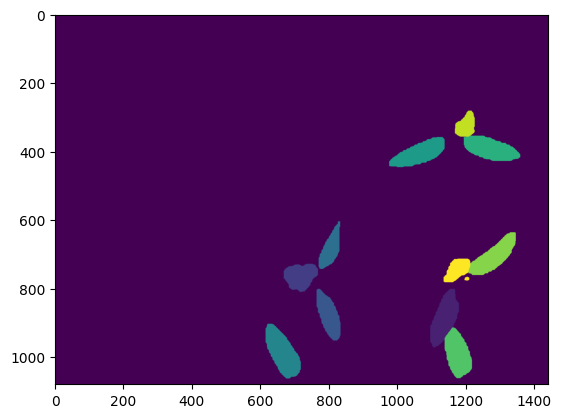

In [172]:
mask_image = Image.open('Images/aggrigated_masks (1).png')
mask_array = np.asarray(mask_image)[:, :, 0:3]
plt.imshow(mask_array)


In [173]:
reshape_mask = np.reshape(mask_array, (1555200, 3))
#pcd_load.colors = o3d.utility.Vector3dVector(reshape_mask/255)
mask_norm = reshape_mask / 255
print(mask_norm[0])

[0.26666667 0.00392157 0.32941176]


In [174]:
o3d.visualization.draw_geometries([pcd_load],
                                  zoom=0.5,
                                  front=[ 0, 0, -1],
                                  lookat=[ 0, 0, .3],
                                  up=[ 0, -1, 0])


In [175]:
pcd_colors = np.asarray(pcd_load.colors)
pcd_points = np.asarray(pcd_load.points)

In [176]:
print(np.size(pcd_points)/3)
print(pcd_colors[0])

1555200.0
[0.42745098 0.32941176 0.28235294]


In [182]:
#for i in range(1000):
 #   if (pcd_colors[i]==mask_norm[0]).all():
  #      pcd_colors = np.delete(pcd_colors, i, 0)
  #      pcd_points = np.delete(pcd_points, i, 0)
pcd_path = "Pointclouds/demo_ (1).pcd"
pcd_load = o3d.io.read_point_cloud(pcd_path, format='pcd')
pcd_colors_orig = np.asarray(pcd_load.colors)

index = np.argwhere(reshape_mask/255==mask_norm[0])
pcd_colors = np.delete(pcd_colors, index, 0)
pcd_points = np.delete(pcd_points, index, 0)
pcd_colors_orig = np.delete(pcd_colors_orig, index, 0)


In [183]:
pcd = o3d.geometry.PointCloud()
pcd.colors = o3d.utility.Vector3dVector(pcd_colors_orig)
pcd.points = o3d.utility.Vector3dVector(pcd_points)

In [184]:
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.5,
                                  front=[ 0, 0, -1],
                                  lookat=[ 0, 0, .3],
                                  up=[ 0, -1, 0])


In [187]:
cl, ind = pcd.remove_statistical_outlier(nb_neighbors=100, std_ratio=1.0)
inlier_cloud = pcd.select_by_index(ind)
outlier_cloud = pcd.select_by_index(ind, invert=True)
outlier_cloud.paint_uniform_color([1, 0, 0])
#inlier_cloud.paint_uniform_color([0.8, 0.8, 0.8])


o3d.visualization.draw_geometries([inlier_cloud],
                                  zoom=0.5,
                                  front=[ 0, 0, -1],
                                  lookat=[ 0, 0, .3],
                                  up=[ 0, -1, 0])

[Open3D WARNING] [ViewControl] SetViewPoint() failed because window height and width are not set.


In [189]:
import pyransac3d as pyrsc

# Load saved point cloud and visualize it

# o3d.visualization.draw_geometries([pcd_load])
points = np.asarray(inlier_cloud.points)

plano1 = pyrsc.Plane()

best_eq, best_inliers = plano1.fit(points, thresh=0.01)
plane = inlier_cloud.select_by_index(best_inliers).paint_uniform_color([1, 0, 0])
obb = plane.get_oriented_bounding_box()
obb2 = plane.get_axis_aligned_bounding_box()
obb.color = [0, 0, 1]
obb2.color = [0, 1, 0]
not_plane = inlier_cloud.select_by_index(best_inliers, invert=True)

o3d.visualization.draw_geometries([not_plane, plane, obb, obb2])

TODO:

Run RANSAC Plane on every single individual leaf. Probably find all unique colors in the pointcloud to segment those into individual pointclouds, and then run the plane RANSAC on each leaf to find its optimal surface.

Organize jupyter notebook so that things can easily run in a single regular python file

Decide if any scripts in here should be consolidated into functions for the sake of organization

Begin structuring ROS Melodic node to run the script

Get benchmarks for performance

Write documentation for the code

Look at mesh reconstruction??? probably not needed

Point cloud registration for multi-view scenario

Generate visuals for Friday share-out

DBScan for clearing out very small clusters

Idea: To automatically remove the bg mask color, sample the average depth of each mask color, and consider the bg to be the color with the lowest average height.